In [1]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preparation / Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

# EDA

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


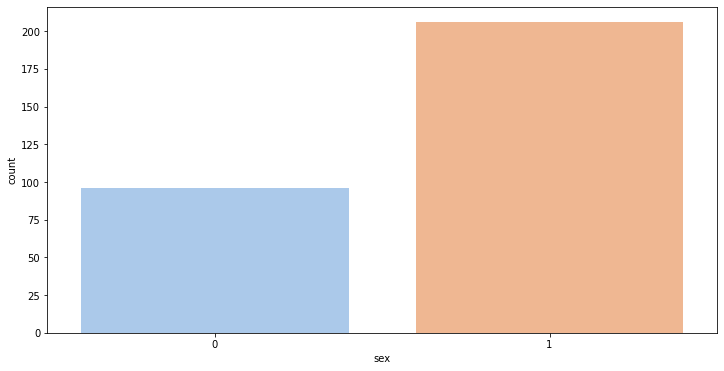

In [12]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(12,6))
ax=plt.axes()
p = sns.countplot(data=df, x="sex", palette='pastel')

<AxesSubplot:xlabel='cp', ylabel='count'>

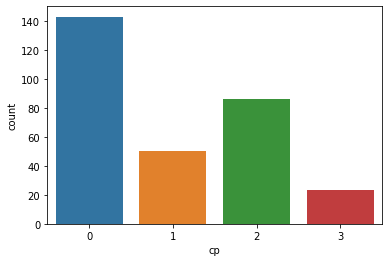

In [15]:
ax=plt.axis()
sns.countplot(x='cp', data=df)

##### 1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest
##### 2. It can be observed people have chest pain of type 3 i.e 'Asymotomatic' is the lowest
##### 3. It can also be observed people have chest pain of type 0 is almost 50% of all the people

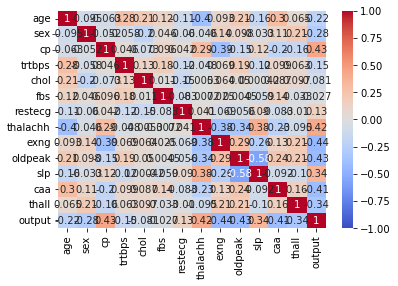

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

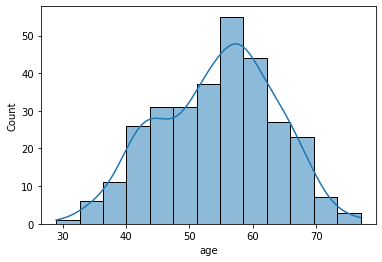

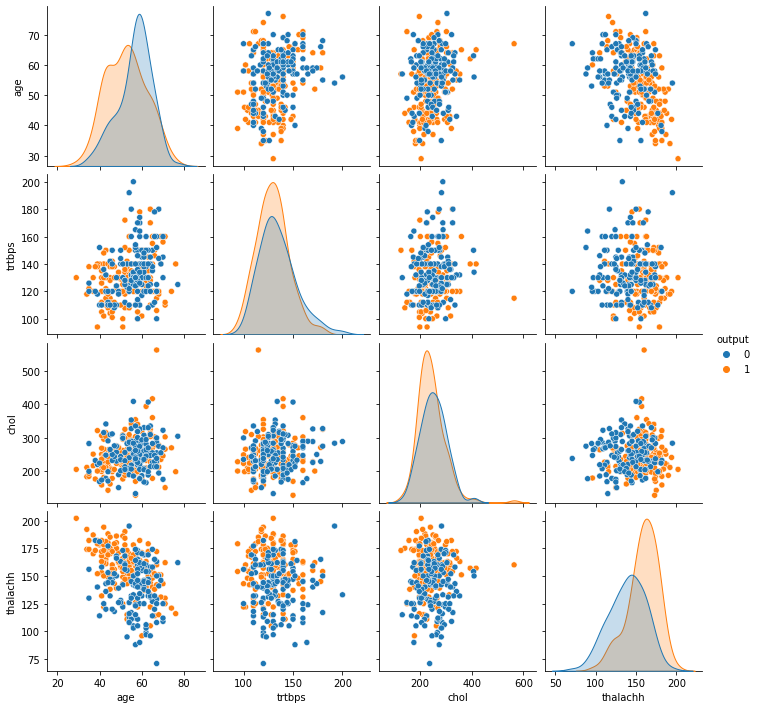

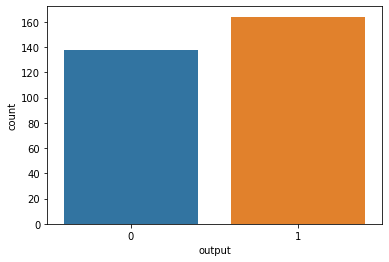

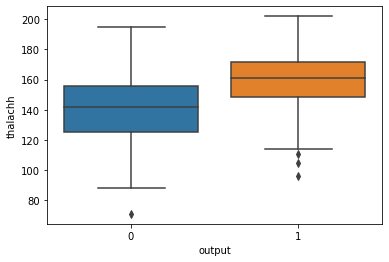

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(df['age'], kde=True)
plt.show()

# Bivariate analysis
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output')
plt.show()

# Visualize the distribution of the target variable
sns.countplot(x='output', data=df)
plt.show()

# Explore the relationship between variables and the target variable
sns.boxplot(x='output', y='thalachh', data=df)
plt.show()

# Compare two different variables and provide short analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


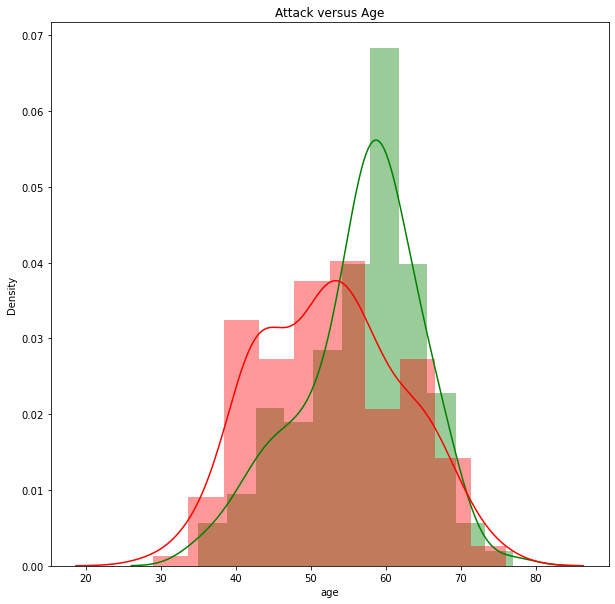

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color= 'green', kde=True,)
sns.distplot(df[df['output'] == 1]["age"], color= 'red', kde=True)
plt.title('Attack versus Age')
plt.show()

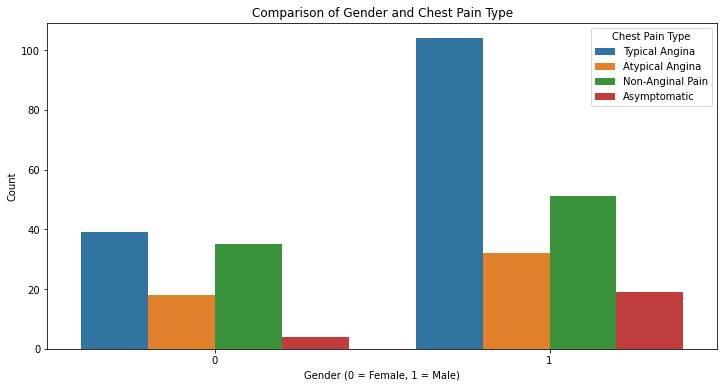

In [24]:
plt.figure(figsize=(12, 6))

sns.countplot(x='sex', hue='cp', data=df)

plt.title('Comparison of Gender and Chest Pain Type')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

plt.show()

##### Male (1) memiliki representasi yang jauh lebih tinggi dibandingkan Female (0). Namun di kedua gender memiliki urutan chest pain type yang sama dari terbesar sampai terkecil yaitu typical angina, non-angina pain, atypical angina, dan asymptomatic 

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression, Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Model: Support Vector Machine, Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Model: Random Forest, Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy  

# Conclusion

#### 
Dari hasil pengujian berbagai model klasifikasi pada dataset ini, K-Nearest Neighbor (KNN) menonjol dengan akurasi tertinggi sebesar 91,80%. Model ini juga menunjukkan presisi dan recall yang baik untuk kedua kelas, membuatnya menjadi pilihan yang kuat dalam memprediksi kemungkinan serangan jantung. Gaussian Naive Bayes, Support Vector Machine (SVM), dan Random Forest juga menunjukkan performa yang solid dengan akurasi antara 85-89% serta presisi dan recall yang seimbang untuk kedua kelas. Sementara Logistic Regression, Bernoulli Naive Bayes, dan XGBoost memberikan hasil yang baik dengan akurasi sekitar 83-87%, meskipun sedikit di bawah model-model terbaik. Pemilihan model tergantung pada kebutuhan spesifik aplikasi, namun K-Nearest Neighbor (KNN) menjadi pilihan utama untuk prediksi yang akurat terkait kemungkinan serangan jantung berdasarkan hasil pengujian ini. 